--2025-05-04 15:21:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.03s   

2025-05-04 15:21:14 (748 KB/s) - ‘student.zip’ saved [20478]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64

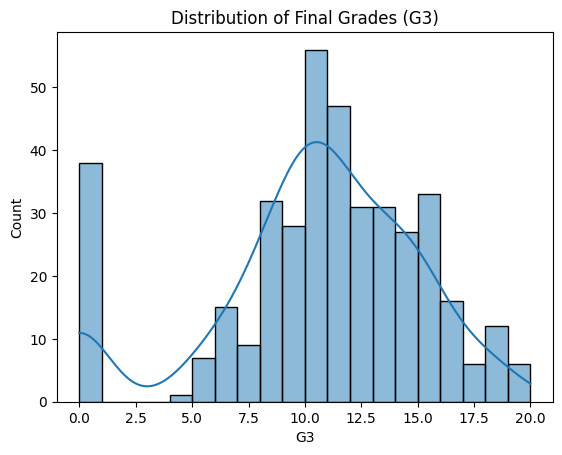

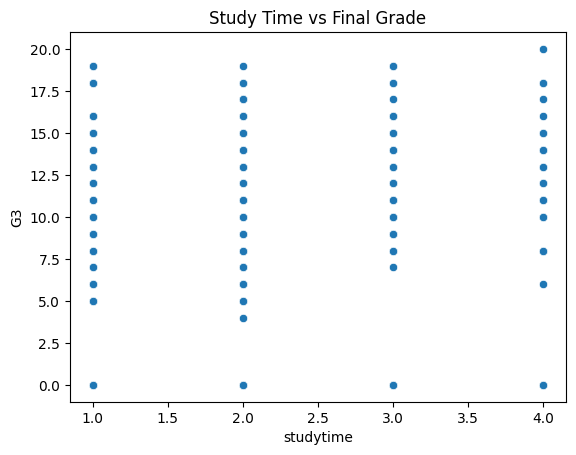

Model Performance
MAE: 1.18
MSE: 3.83
RMSE: 1.96
R-squared: 0.81


In [1]:
# Predicting Student Final Grades Based on Demographics, Family, and School Factors - Google Colab Notebook

# =======================
# 1. Import Libraries
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from google.colab import files
import zipfile
import io

# =======================
# 2. Load Dataset
# =======================
# Download dataset from UCI repository
!wget -O student.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

# Extract and read the CSV from ZIP
with zipfile.ZipFile("student.zip", 'r') as zip_ref:
    zip_ref.extractall("student_data")

# Load dataset (you can use either 'student-mat.csv' or 'student-por.csv')
df = pd.read_csv("student_data/student-mat.csv", sep=';')
df.head()

# =======================
# 3. Exploratory Data Analysis
# =======================
print(df.info())
print(df.describe())

# Plot distribution of final grades
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.show()

# Scatter plot of study time vs final grade
sns.scatterplot(data=df, x='studytime', y='G3')
plt.title('Study Time vs Final Grade')
plt.show()

# =======================
# 4. Data Preprocessing
# =======================
# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Define features and target
X = df.drop("G3", axis=1)
y = df["G3"]

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# =======================
# 5. Model Building Pipeline
# =======================
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# =======================
# 6. Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================
# 7. Train the Model
# =======================
model.fit(X_train, y_train)

# =======================
# 8. Predictions & Evaluation
# =======================
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")